In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# Load dataset

In [ ]:
data = pd.read_csv("/kaggle/input/air-france-reviews-dataset/airfrance_tripadvisor_reviews.csv")

In [ ]:
data.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [ ]:
# Convert dates
data['publishedDate'] = pd.to_datetime(data['publishedDate'])

# Word Count
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Sentiment Analysis
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Cleaned Text
nltk.download('stopwords')
stop = set(stopwords.words('english'))
data['cleaned_text'] = data['text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word.lower() not in stop]
))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# EDA

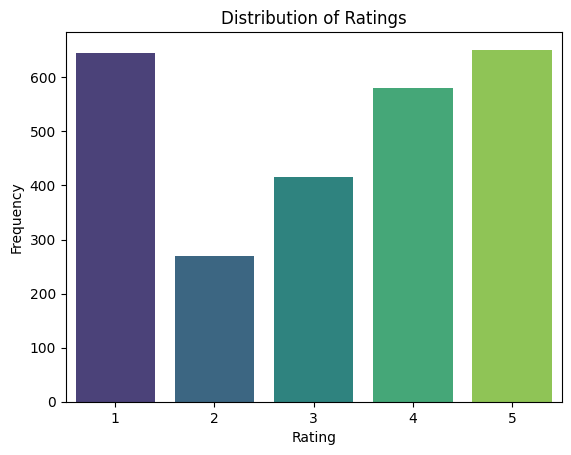

In [ ]:
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


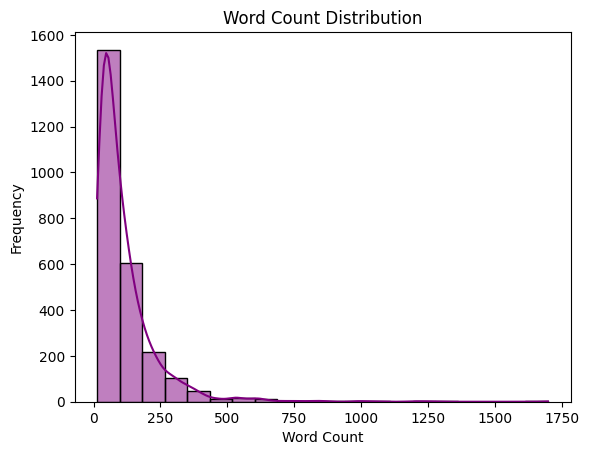

In [ ]:
sns.histplot(data['word_count'], kde=True, bins=20, color='purple')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


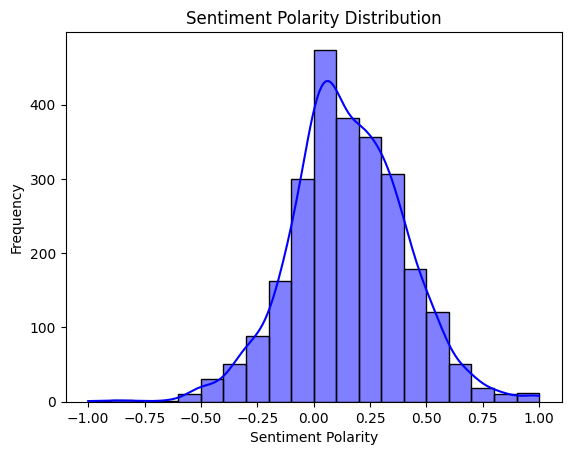

In [ ]:
sns.histplot(data['sentiment'], kde=True, bins=20, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


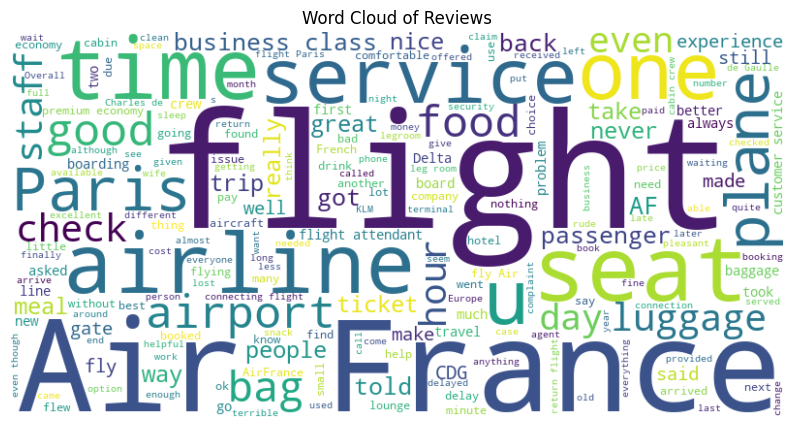

In [ ]:
text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


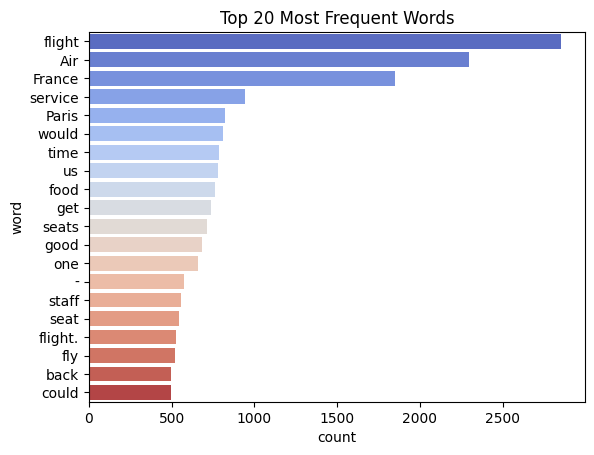

In [ ]:
words = ' '.join(data['cleaned_text']).split()
counter = Counter(words)
common_words = counter.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

sns.barplot(y='word', x='count', data=common_words_df, palette='coolwarm')
plt.title('Top 20 Most Frequent Words')
plt.show()


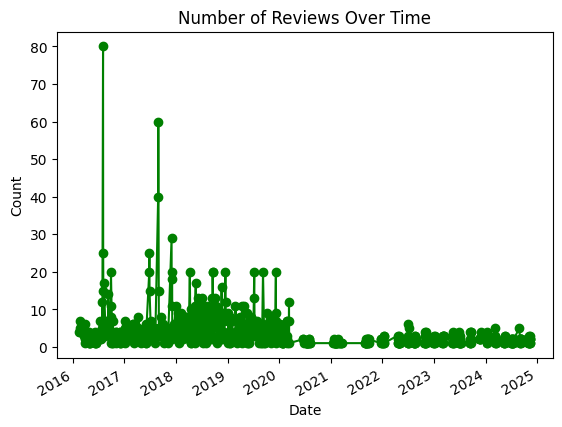

In [ ]:
data.groupby('publishedDate').size().plot(kind='line', marker='o', color='green')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


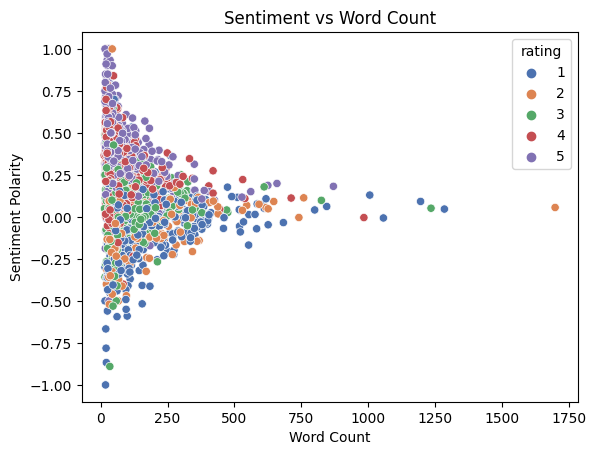

In [ ]:
sns.scatterplot(x='word_count', y='sentiment', hue='rating', data=data, palette='deep')
plt.title('Sentiment vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Polarity')
plt.show()


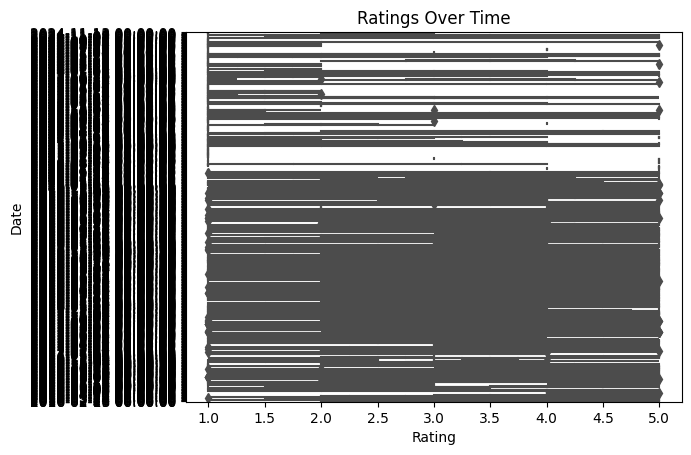

In [ ]:
sns.boxplot(x='rating', y='publishedDate', data=data, palette='cool')
plt.title('Ratings Over Time')
plt.xlabel('Rating')
plt.ylabel('Date')
plt.show()


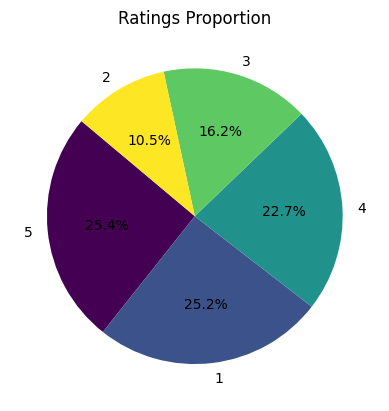

In [ ]:
data['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Ratings Proportion')
plt.ylabel('')
plt.show()


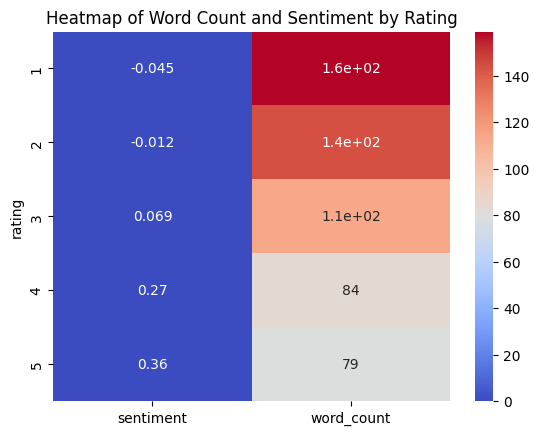

In [ ]:
heatmap_data = data.pivot_table(index='rating', values=['word_count', 'sentiment'], aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Word Count and Sentiment by Rating')
plt.show()


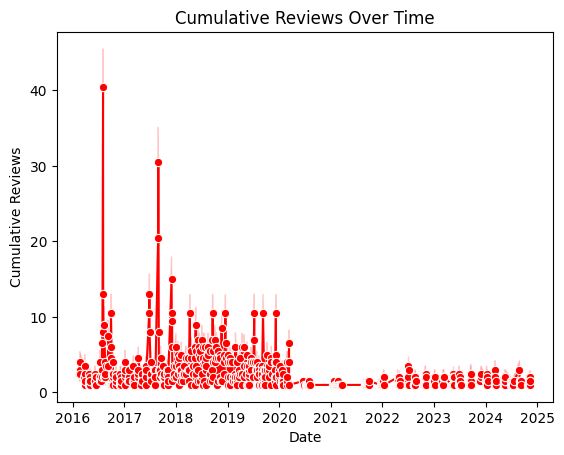

In [ ]:
data['cumulative_reviews'] = data.groupby('publishedDate').cumcount() + 1
sns.lineplot(x='publishedDate', y='cumulative_reviews', data=data, marker='o', color='red')
plt.title('Cumulative Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Reviews')
plt.show()


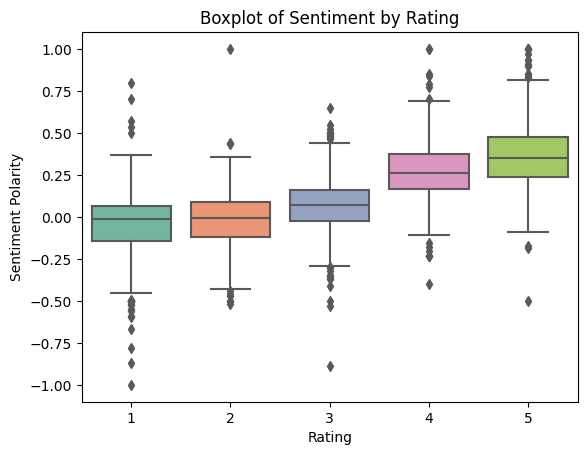

In [ ]:
sns.boxplot(x='rating', y='sentiment', data=data, palette='Set2')
plt.title('Boxplot of Sentiment by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()


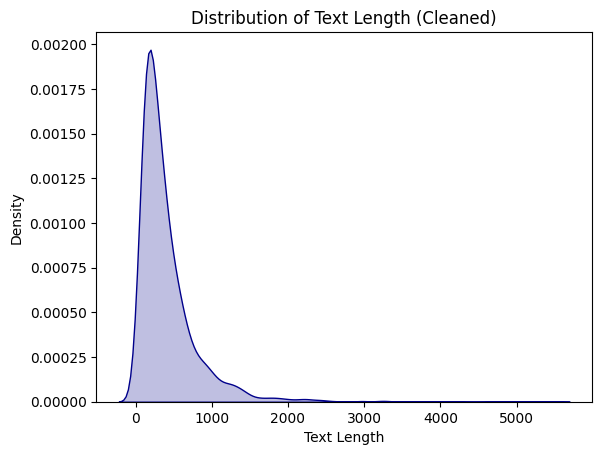

In [ ]:
data['text_length'] = data['cleaned_text'].apply(len)
sns.kdeplot(data['text_length'], shade=True, color='darkblue')
plt.title('Distribution of Text Length (Cleaned)')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()


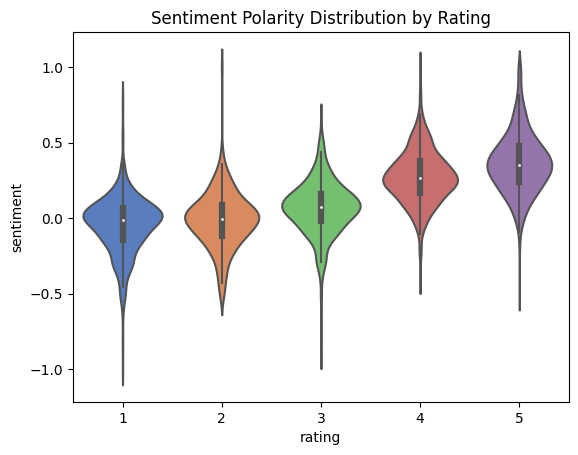

In [ ]:
sns.violinplot(x='rating', y='sentiment', data=data, palette='muted')
plt.title('Sentiment Polarity Distribution by Rating')
plt.show()


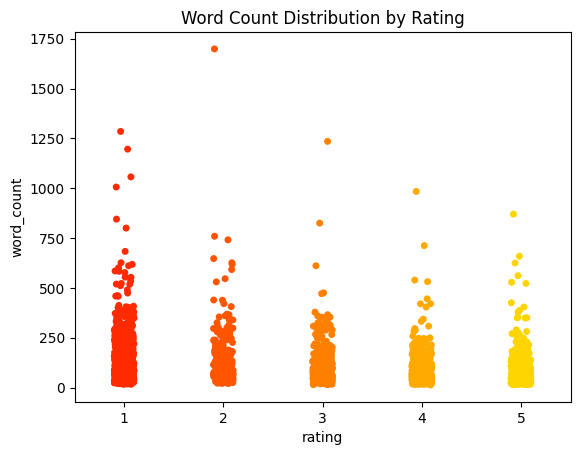

In [ ]:
sns.stripplot(x='rating', y='word_count', data=data, palette='autumn', jitter=True)
plt.title('Word Count Distribution by Rating')
plt.show()


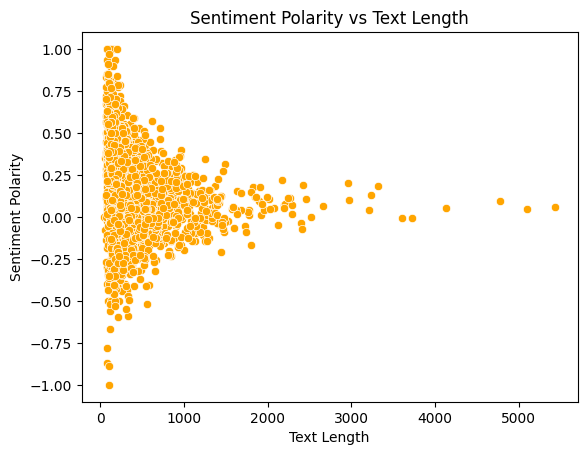

In [ ]:
sns.scatterplot(x='text_length', y='sentiment', data=data, color='orange')
plt.title('Sentiment Polarity vs Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Polarity')
plt.show()


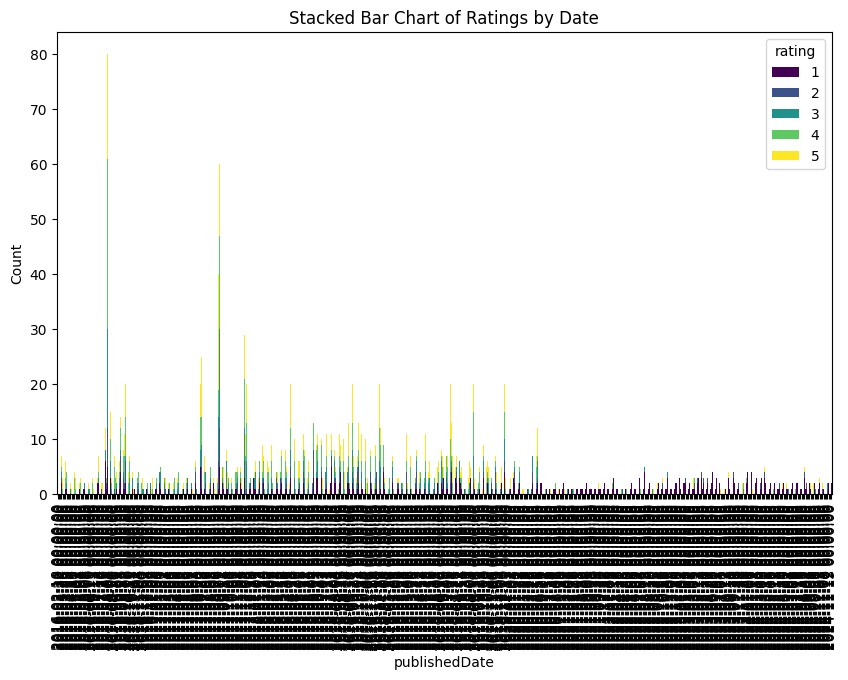

In [ ]:
ratings_by_date = data.groupby(['publishedDate', 'rating']).size().unstack(fill_value=0)
ratings_by_date.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Stacked Bar Chart of Ratings by Date')
plt.ylabel('Count')
plt.show()


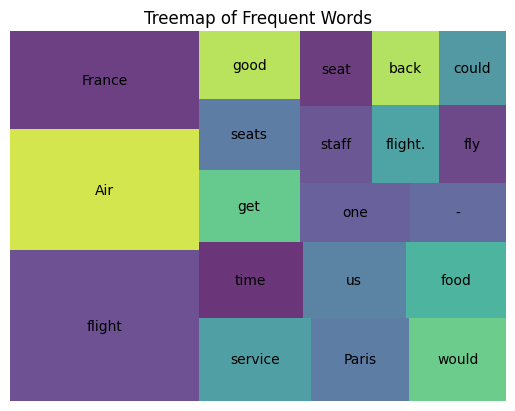

In [ ]:
import squarify
sizes = [x[1] for x in common_words]
labels = [x[0] for x in common_words]
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title('Treemap of Frequent Words')
plt.show()


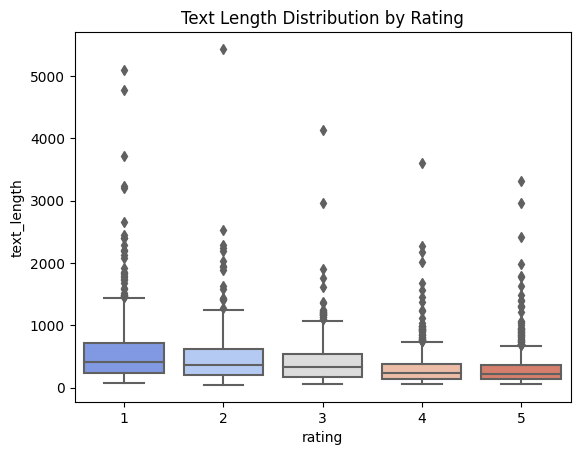

In [ ]:
sns.boxplot(x='rating', y='text_length', data=data, palette='coolwarm')
plt.title('Text Length Distribution by Rating')
plt.show()


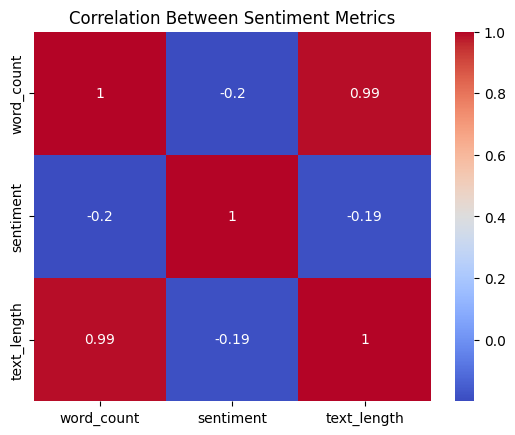

In [ ]:
correlation = data[['word_count', 'sentiment', 'text_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sentiment Metrics')
plt.show()


# Data Preprocessing

In [ ]:
# Check for null values
print(data.isnull().sum())


rating                0
title                 0
text                  0
publishedDate         0
word_count            0
sentiment             0
cleaned_text          0
cumulative_reviews    0
text_length           0
dtype: int64


In [ ]:
# Convert `publishedDate` to datetime format
data['publishedDate'] = pd.to_datetime(data['publishedDate'])

In [ ]:
# Preprocess text: remove stopwords, convert to lowercase
stop = set(stopwords.words('english'))
data['cleaned_text'] = data['text'].apply(lambda x: ' '.join(
    [word.lower() for word in str(x).split() if word.lower() not in stop]
))

In [ ]:
# Split data into train and test
X = data['cleaned_text']
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Exploratory data analysis

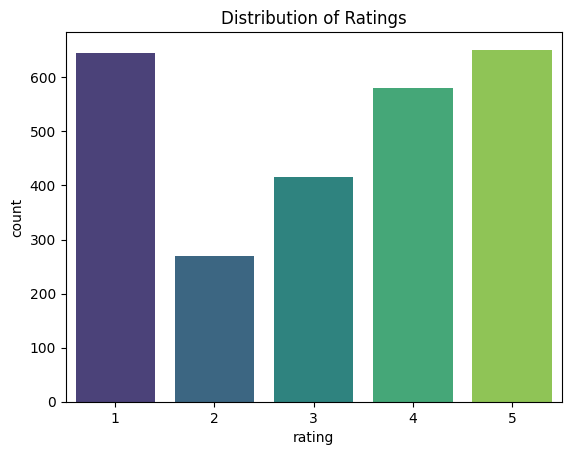

In [ ]:
# Rating distribution
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

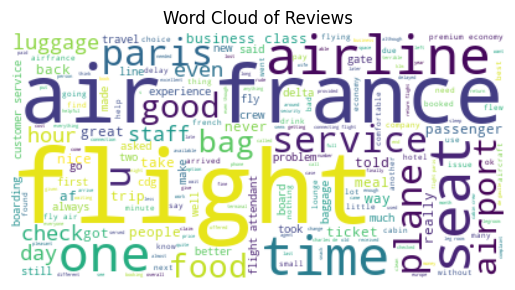

In [ ]:
# Word Cloud
text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

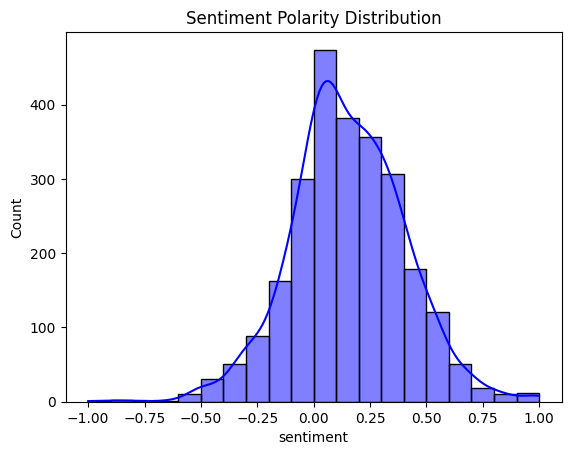

In [ ]:
# Sentiment Analysis using TextBlob
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(data['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.show()

# Model Building

In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)


# Evaluation with curves

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

              precision    recall  f1-score   support

           1       0.62      0.84      0.71       129
           2       0.00      0.00      0.00        54
           3       0.41      0.27      0.32        83
           4       0.51      0.57      0.54       116
           5       0.64      0.72      0.68       130

    accuracy                           0.57       512
   macro avg       0.43      0.48      0.45       512
weighted avg       0.50      0.57      0.53       512



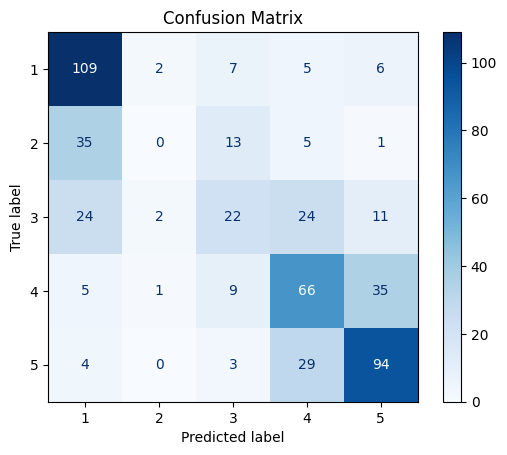

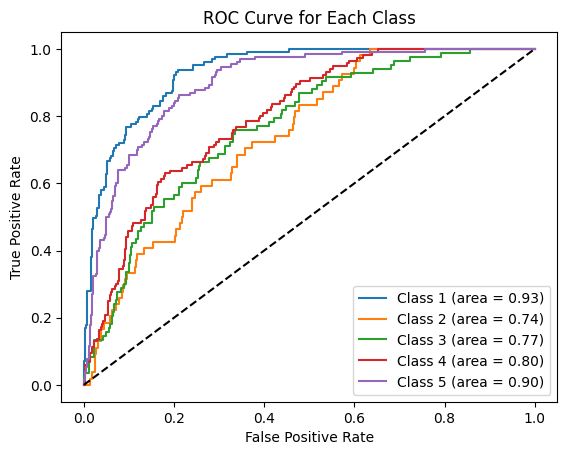

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_pred_prob = model.predict_proba(X_test_tfidf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pickle

# Save the model
pickle.dump(model, open('logistic_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))


# Model and Vectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True